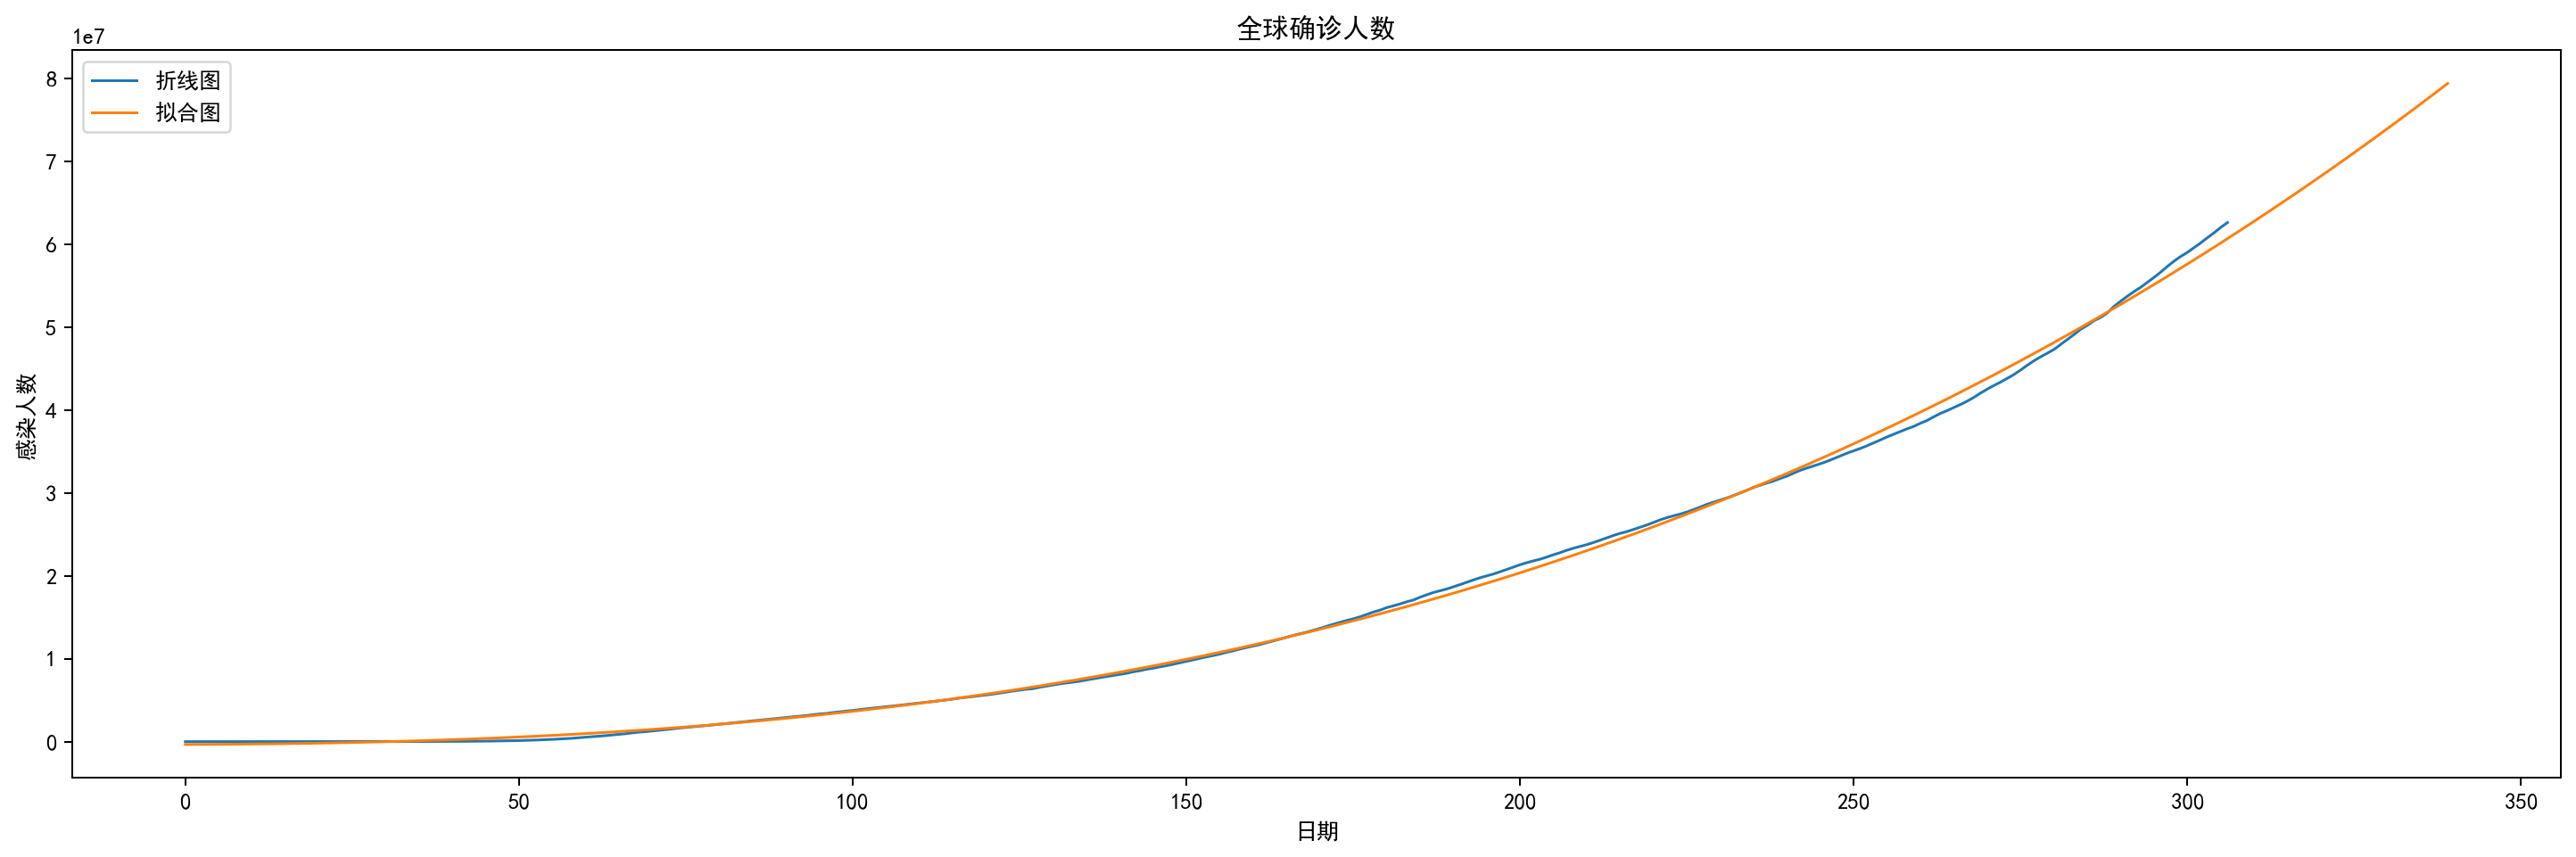

0.32668161392211914


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
#g(x)= a1 + a2*x + a3 * x^2 + a4 * x^3
start = time.time()
e = []
data = pd.read_csv('alltime_world.csv')
point = list(t / 4 for t in range(0,1357))

#Gt * G * a = Gt * y
def ordinaryleastsquares(data1,data2):
    G = np.array([[1,i,i**2,i**3]for x in range(len(data1)) for i in data1[x]])#G矩阵
    T = G.T#G的转置T
    h = np.dot(T,G)#G的转置矩阵与G矩阵相乘
    Y = data2#Y矩阵
    t = np.dot(T,Y)#G的转置矩阵与Y相乘
    M = np.linalg.inv(h)
    A = np.dot(M,t)
    a1 = A[0][0]
    a2 = A[1][0]
    a3 = A[2][0]
    a4 = A[3][0]
    for x in point:
        g = (a1) + (a2 * x) + (a3 * (x ** 2)) + (a4 * (x ** 3))
        e.append(g)

if __name__ == '__main__':
    data1 = np.array(data.iloc[:, 0]).reshape(-1, 1)
    data2 = np.array(data.iloc[:, 2]).reshape(-1, 1)
    ordinaryleastsquares(data1, data2)

plt.figure(figsize=(20,6),dpi=180)
plt.plot(data2,label = '折线图',linewidth=1.2)
plt.plot(point,e,label = '拟合图',linewidth=1.2)
plt.title('全球确诊人数')
plt.xlabel('日期',fontsize='10')
plt.ylabel('感染人数',fontsize='10')
plt.legend()
plt.show()

end = time.time()
time = end - start
print(time)


一阶差商个数为: 50
一阶差商为 [-0.30859999999999954, 0.046399999999999865, 0.0875, -0.033500000000000224, 0.11949999999999988, -0.14409999999999967, 0.20199999999999987, -0.1321999999999997, -0.1582000000000005, 0.1878000000000003, -0.06819999999999993, -0.010600000000000023, -0.12439999999999998, 0.20149999999999976, -0.15829999999999983, 0.05209999999999979, 0.09569999999999994, -0.036499999999999776, -0.10269999999999982, 0.03180000000000007, 0.23529999999999973, -0.0779000000000002, -0.1319999999999999, 0.15439999999999998, -0.2320999999999998, 0.17490000000000008, -0.1481, 0.057299999999999615, 0.014399999999999977, 0.12560000000000002, -0.14159999999999967, 0.015199999999999818, -0.003100000000000023, 0.05009999999999991, 0.09379999999999995, -0.032799999999999725, -0.07529999999999973, -0.11110000000000014, 0.17240000000000008, -0.08280000000000029, -0.07219999999999971, 0.04789999999999964, -0.031399999999999866, 0.05170000000000016, 0.0571999999999997, -0.07240000000000009, 0.094800000000

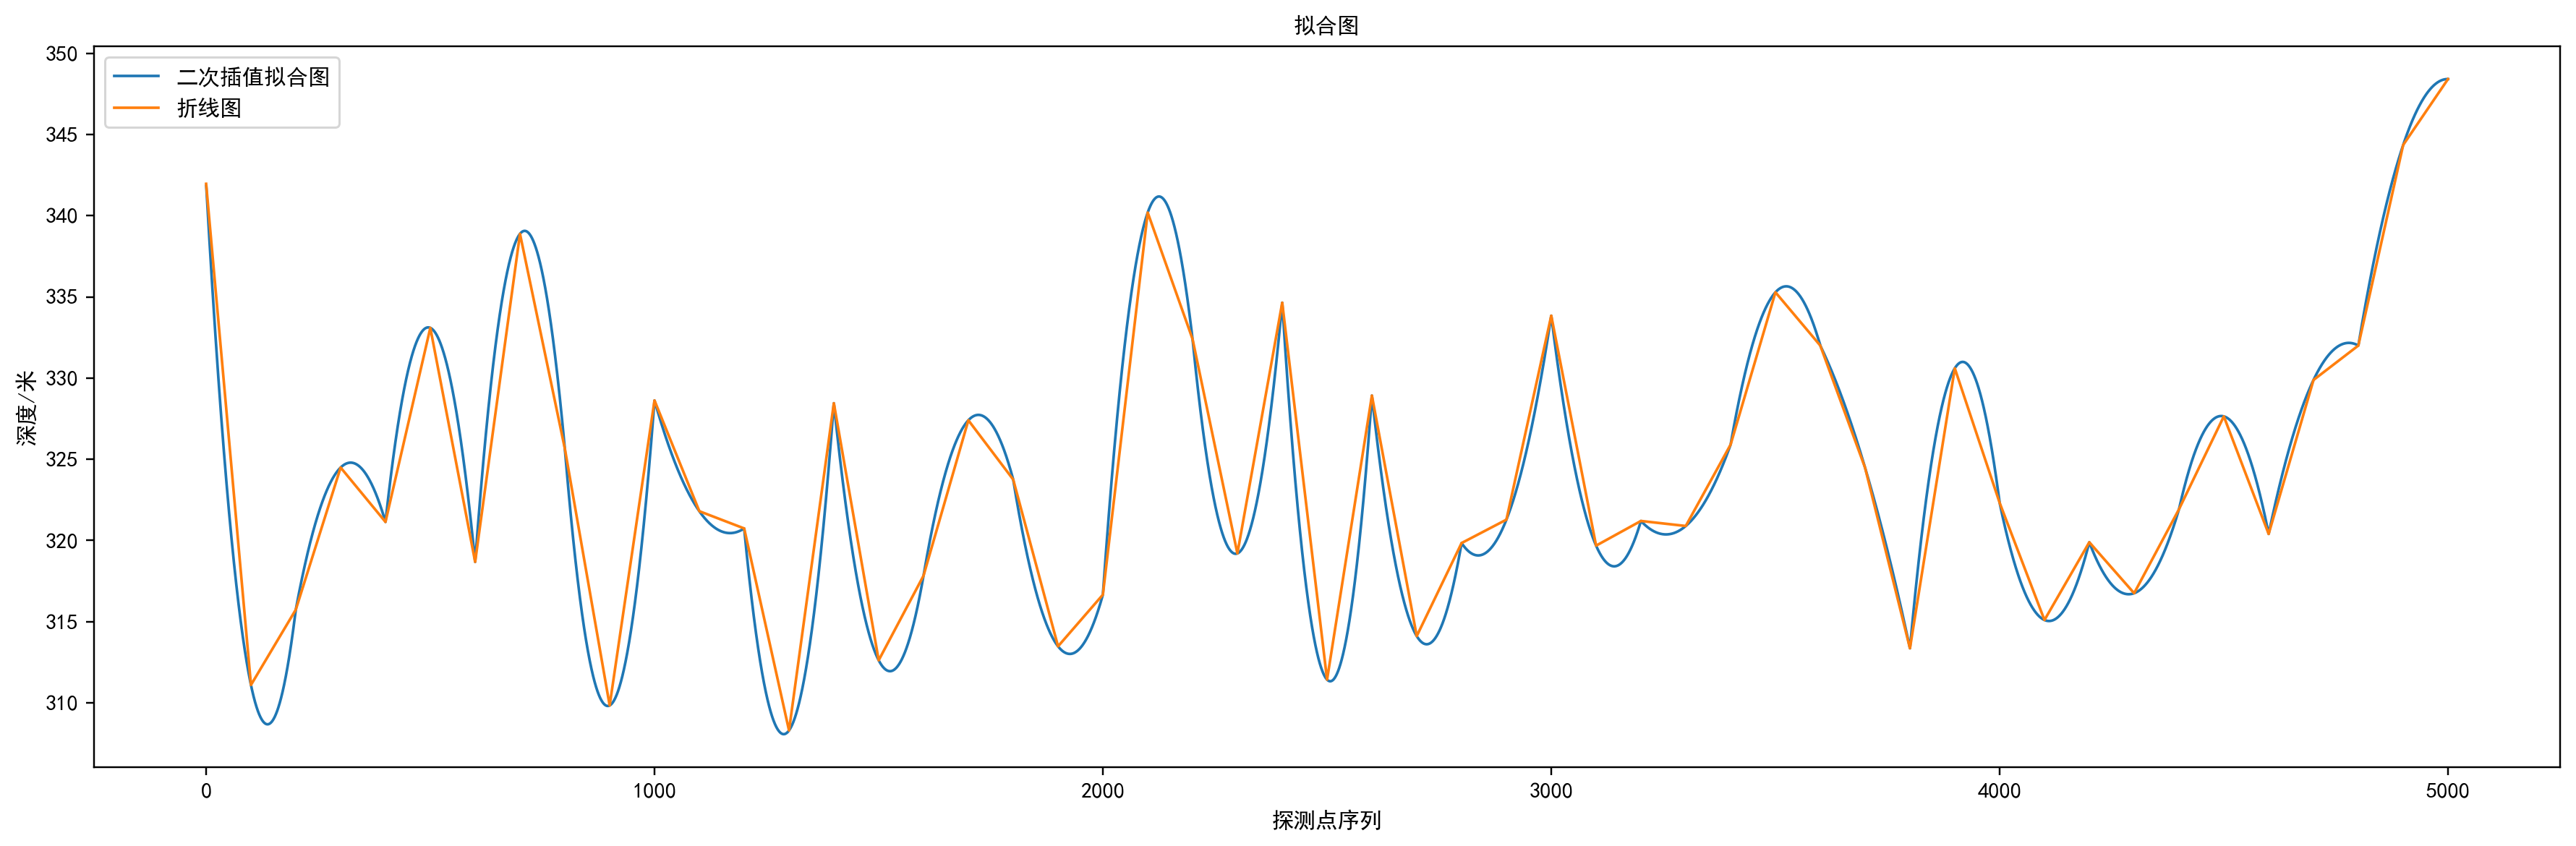

0.9974339008331299


In [4]:
import time
import pandas as pd
from matplotlib import pyplot as plt
import math
start = time.time()
plt.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv('sea2020.csv',encoding='gb18030')
a = data.iloc[:,0]#数据第一列（海底深度）
b = data.iloc[:,1]#数据第二列（数据单位米）
c=[]#存放一阶差商
d=[]#存放二阶差商

#一阶差商
for i in range(len(a)-1):
    y1= (b[i+1] - b[i]) / (a[i+1] - a[i])
    c.append(y1)
print('一阶差商个数为:',len(c))
print('一阶差商为',c)
#二阶差商
for i in range(len(c)-1):
    y2 = (c[i+1] - c[i]) / (a[i+2] - a[i])
    d.append(y2)
print('二阶差商个数为：',len(d))
print('二阶差商为',d)
e=[]
length = 0
point = list(t / 4 for t in range(1,20001))
for i in range(0,(len(d)+1) , 2):
    for x in point[400*i:(i+2)*400]:
        g = b[i] + (c[i] * (x - a[i])) + (d[i] * (x - a[i]) * (x - a[i+1]))
        e.append(g)

for i in range(len(e)-1):
    length += math.hypot((e[i] - e[i+1]),0.25)

print('一共所需光缆长度为：',length,'米')
plt.figure(figsize=(20,6),dpi=220)
plt.plot(point,e,linewidth=1.2,label = '二次插值拟合图')
plt.plot(a,b,linewidth=1.2,label='折线图')
plt.title('拟合图',fontsize='10')
plt.xlabel('探测点序列',fontsize='10')
plt.ylabel('深度/米',fontsize='10')
plt.legend()
plt.show()
end = time.time()
time = end - start
print(time)

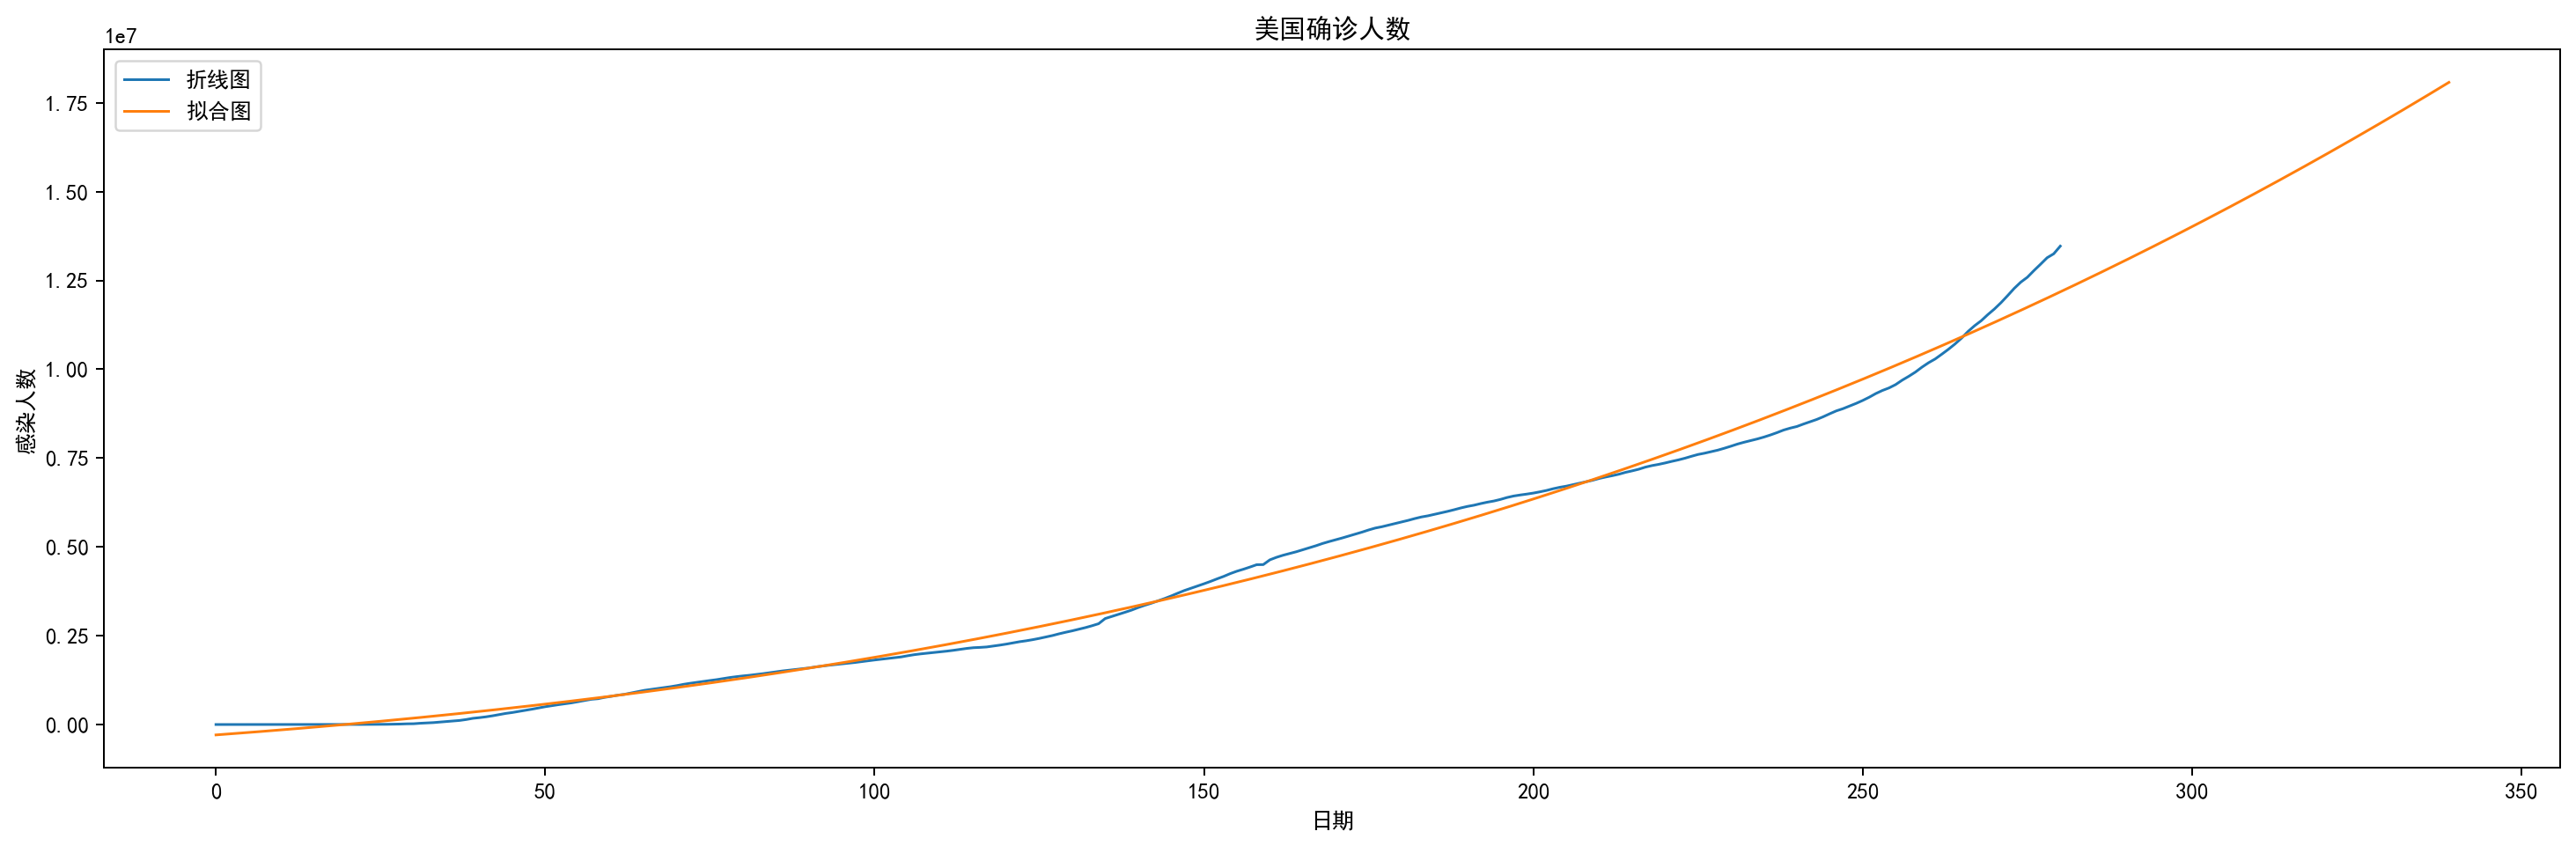

0.38948488235473633


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
#g(x)= a1 + a2*x + a3 * x^2 + a4 * x^3
start = time.time()
e = []
data = pd.read_csv('alltime_american.csv',encoding='GBK')
point = list(t / 4 for t in range(0,1357))

#Gt * G * a = Gt * y
def ordinaryleastsquares(data1,data2):
    G = np.array([[1,i,i**2,i**3]for x in range(len(data1)) for i in data1[x]])#G矩阵
    T = G.T#G的转置T
    h = np.dot(T,G)#G的转置矩阵与G矩阵相乘
    Y = data2#Y矩阵
    t = np.dot(T,Y)#G的转置矩阵与Y相乘
    M = np.linalg.inv(h)
    A = np.dot(M,t)
    a1 = A[0][0]
    a2 = A[1][0]
    a3 = A[2][0]
    a4 = A[3][0]
    for x in point:
        g = (a1) + (a2 * x) + (a3 * (x ** 2)) + (a4 * (x ** 3))
        e.append(g)

if __name__ == '__main__':
    data1 = np.array(data.iloc[:, 0]).reshape(-1, 1)
    data2 = np.array(data.iloc[:, 2]).reshape(-1, 1)
    ordinaryleastsquares(data1, data2)

plt.figure(figsize=(20,6),dpi=180)
plt.plot(data2,label = '折线图',linewidth=1.2)
plt.plot(point,e,label = '拟合图',linewidth=1.2)
plt.title('美国确诊人数')
plt.xlabel('日期',fontsize='10')
plt.ylabel('感染人数',fontsize='10')
plt.legend()
plt.show()

end = time.time()
time = end - start
print(time)


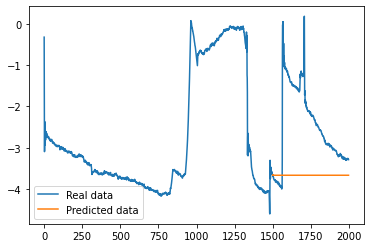

3092582.7960127485


In [1]:
#ARIMA
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
if __name__ == '__main__':
    path = r'28min_data.csv'
    training_set = pd.read_csv(path)
    training_set = training_set.iloc[:,0:1].values
    
    size_train = 1500
    y = training_set
    train,test = train_test_split(y,train_size=size_train)
    #训练模型
    model = pm.auto_arima(train,seasonal=True,m=12)
    
    #预测分析
    forecasts = model.predict(test.shape[0])
    
    #模型可视化(蓝：训练 绿：预测)
    x = np.arange(y.shape[0]) 
    plt.plot(x,training_set,label='Real data')
    plt.plot(x[size_train:],forecasts,label='Predicted data')
    plt.legend()
    plt.show()
    
    #计算误差值MSE
    MSE = mean_squared_error(x[size_train:],forecasts)
    print(MSE)
#不准

Iteration:0,loss:0.5009039640426636
Iteration:100,loss:0.004646004643291235
Iteration:200,loss:0.007468904368579388
Iteration:300,loss:0.0021983860060572624
Iteration:400,loss:0.0002378278149990365
Iteration:500,loss:0.0011241633910685778
Iteration:600,loss:0.0011897352524101734
Iteration:700,loss:0.0035283227916806936
Iteration:800,loss:0.003218796569854021
Iteration:900,loss:0.003929488360881805
Iteration:1000,loss:0.000726827303878963
Iteration:1100,loss:0.0018480675062164664
Iteration:1200,loss:0.0004565174749586731
Iteration:1300,loss:0.00196049059741199
Iteration:1400,loss:0.0011787747498601675
Iteration:1500,loss:0.0007535527693107724
Iteration:1600,loss:0.0016549245920032263
Iteration:1700,loss:0.0008435571799054742
Iteration:1800,loss:0.0006420612335205078
Iteration:1900,loss:0.00026852075825445354
Iteration:2000,loss:0.00033887242898344994
Iteration:2100,loss:0.0002909745671786368
Iteration:2200,loss:0.0012240969808772206
Iteration:2300,loss:0.0005744214286096394
Iteration:24

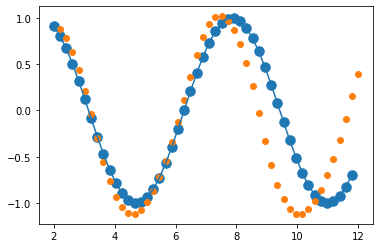

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr = 0.01

class Net(nn.Module):
    
    def __init__(self,):
        super(Net,self).__init__()
        
        self.rnn  = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers = 1,
            batch_first = True,
        )
        for p in self.rnn.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
            
        self.linear  = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        
        out,hidden_prev = self.rnn(x,hidden_prev)
        
        out =  out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim = 0)
        return out,hidden_prev

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr)

hidden_prev = torch.zeros(1,1,hidden_size)

for iter in range(6000):
    start = np.random.randint(3,size=1)[0]
    time_steps = np.linspace(start,start + 10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)
    
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if iter % 100 == 0:
        print(f'Iteration:{iter},loss:{loss.item()}')
        
start = np.random.randint(3,size=1)[0]
time_steps = np.linspace(start,start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)

predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])
    
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())

plt.scatter(time_steps[1:],predictions)
plt.show()